# Data Challenge - News Category Classification

###  Problem:

Your analytics firm was hired by a major news publisher on the West Coast to help with a data recovery task.  In short, there was an outage and part of the content database was lost and is not recoverable.  Luckily, the data was only lost for a small number of articles over the last few days.

You have been asked to use the training set in order to predict/infer the category of the news articles in the evaluation set.

### The Task

- Work in team/neighbors.  You should not be attempting this on your own!
- Review the text datasets and fit a supervised classifiation model to predict the news categories labels __using the training dataset__
- Apply the model to the evaluation set so that you predict the category
- Save out your predictions as a csv file (id, category) and upload to the data challenge leaderboard

### Info

- The data can be found in the Github repo under data-challenges
- The Training file will be used to fit your model
- You apply the model to the evaluation set
- __To see an example of a proper submission file, please review the sample submission__






In [ ]:
# installs
! pip install -U spacy

     |████████████████████████████████| 6.0 MB 5.2 MB/s 
     |████████████████████████████████| 42 kB 1.1 MB/s 
     |████████████████████████████████| 181 kB 29.2 MB/s 
     |████████████████████████████████| 451 kB 36.9 MB/s 
     |████████████████████████████████| 10.1 MB 32.1 MB/s 
     |████████████████████████████████| 628 kB 43.2 MB/s 
  Attempting uninstall: catalogue
    Found existing installation: catalogue 1.0.0
    Uninstalling catalogue-1.0.0:
      Successfully uninstalled catalogue-1.0.0
  Attempting uninstall: srsly
    Found existing installation: srsly 1.0.5
    Uninstalling srsly-1.0.5:
      Successfully uninstalled srsly-1.0.5
  Attempting uninstall: thinc
    Found existing installation: thinc 7.4.0
    Uninstalling thinc-7.4.0:
      Successfully uninstalled thinc-7.4.0
  Attempting uninstall: spacy
    Found existing installation: spacy 2.2.4
    Uninstalling spacy-2.2.4:
      Successfully uninstalled spacy-2.2.4


In [ ]:
# imports
import numpy as np
import pandas as pd
import spacy
from spacy import cli 
import seaborn as sns

from sklearn import metrics
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.manifold import TSNE



In [ ]:
# get the repo for the data
! git clone https://github.com/Btibert3/BA820-Fall-2021.git

Cloning into 'BA820-Fall-2021'...
remote: Enumerating objects: 664, done.
remote: Counting objects: 100% (664/664), done.
remote: Compressing objects: 100% (511/511), done.
remote: Total 664 (delta 309), reused 453 (delta 125), pack-reused 0
Receiving objects: 100% (664/664), 17.73 MiB | 25.04 MiB/s, done.
Resolving deltas: 100% (309/309), done.


In [ ]:
# read in the files
train = pd.read_csv("/content/BA820-Fall-2021/data-challenges/12-news-classification/train.csv")
eval = pd.read_csv("/content/BA820-Fall-2021/data-challenges/12-news-classification/eval.csv")

In [ ]:
# get spacy model
model = "en_core_web_lg"
cli.download(model)

nlp = spacy.load(model)

✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_lg')


![](https://snipboard.io/3ZH4e9.jpg)

In [ ]:
# the pipeline
nlp.pipe_names

['tok2vec', 'tagger', 'parser', 'attribute_ruler', 'lemmatizer', 'ner']

In [ ]:
# process the text
EXCL = ['tagger', 'parser', 'attribute_ruler', 'lemmatizer', 'ner']
docs = list(nlp.pipe(train.text, disable=EXCL))

In [ ]:
# get the vectors
dv = [doc.vector for doc in docs]
dv = np.array(dv)
dv.shape

(100, 300)

In [ ]:
# get the dvs for the eval set
eval_docs = list(nlp.pipe(eval.text))

eval_dv = [doc.vector for doc in eval_docs]
eval_dv = np.array(eval_dv)

eval_dv.shape

(65, 300)

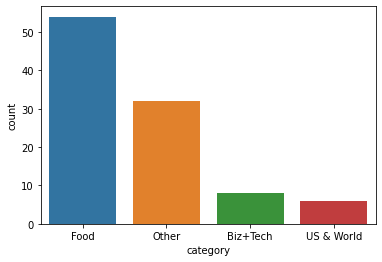

In [ ]:
# what do we have for categories
sns.countplot(x="category", data=train)

In [ ]:
# small dataset, and unbalanced, but lets give it a shot

scores = []
krange = range(2, 16)

for i in krange:
  knn = KNeighborsClassifier(i)
  knn.fit(dv, train.category)
  preds = knn.predict(dv)
  kscore = metrics.accuracy_score(train.category, preds)
  scores.append(kscore)


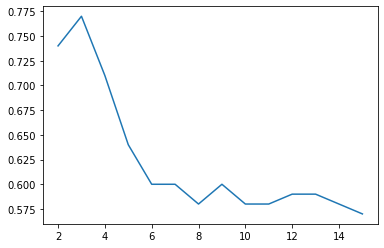

In [ ]:
# the plot
sns.lineplot(x=krange, y=scores)

In [ ]:
# fit again with 3
knn = KNeighborsClassifier(3)
knn.fit(dv, train.category)


KNeighborsClassifier(n_neighbors=3)

In [ ]:
# appends to the eval dataset
preds = knn.predict(eval_dv)
eval['preds'] = preds

In [ ]:
# create the submission file
submit = eval[['id', 'preds']]
submit.columns = ['id', 'category']

In [ ]:
submit.head(3)

,id,category
0,4.0,Biz+Tech
1,13.0,Biz+Tech
2,16.0,Other


In [ ]:
submit.shape

(65, 2)

In [ ]:
# write the file
submit.to_csv("brock-submit.csv", index=False)